## How to Use EvalxNLP Framework for Natural Language Inference – A Beginner-Friendly Guide 🚀

Natural Language Inference (NLI) is a Natural Language Processing (NLP) task that involves determining the logical relationship between two sentences: a premise and a hypothesis. The goal is to classify whether the hypothesis is entailed (supported by the premise), contradicted (opposed by the premise), or neutral (neither supported nor opposed).

### Natural Language Inference:

- **Entailment**: The hypothesis is logically supported by the premise.
- **Contradiction**: The hypothesis is logically opposed by the premise.
- **Neutral**: The hypothesis is neither supported nor opposed by the premise.

In [1]:
import sys
sys.path.append('..')
from XAIbenchmark import XAIFramework
import warnings

warnings.filterwarnings("ignore")

d:\TUM courses\thesis- nlp\EvalxNLP\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

#### Single Sentence

Step 1: Load a pre-trained NLI Model, and Tokenizer

In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Step 2: Optionally initialize the explainers, and evaluators

In [4]:
from explainers import InputXGradientExplainer, IntegratedGradientsExplainer, DeepLiftExplainer, LimeExplainer, SHAPExplainer, SHAPIQExplainer, GuidedBackpropExplainer

ig= IntegratedGradientsExplainer(model,tokenizer)
gb= GuidedBackpropExplainer(model,tokenizer)
dl= DeepLiftExplainer(model,tokenizer)
ixg= InputXGradientExplainer(model,tokenizer,multiply_by_inputs=True)
g= InputXGradientExplainer(model,tokenizer,multiply_by_inputs=False)
lime= LimeExplainer(model,tokenizer)
shap= SHAPExplainer(model,tokenizer)
shapiq= SHAPIQExplainer(model,tokenizer)

In [5]:
from evaluators import AUCTPEvaluator, SoftComprehensivenessEvaluator, SoftSufficiencyEvaluator, FADEvaluator, SparsenessEvaluator, ComplexityEvaluator, IOUF1Evaluator,TokenF1Evaluator, AUPRCEvaluator

sc= SoftComprehensivenessEvaluator(model,tokenizer)
ss= SoftSufficiencyEvaluator(model,tokenizer)
fad= FADEvaluator(model,tokenizer)
sp= SparsenessEvaluator(model,tokenizer)
cx= ComplexityEvaluator(model,tokenizer)
auctp= AUCTPEvaluator(model,tokenizer)
iou_f1= IOUF1Evaluator(model,tokenizer)
token_f1= TokenF1Evaluator(model,tokenizer)
auprc= AUPRCEvaluator(model,tokenizer)

Step 3: Inialize XAIBenchmark Class

In [6]:
xai_framework = XAIFramework(model, tokenizer,explainers=[dl,ig,gb,ixg,g], evaluators=[sp])

> **Note:** If you don’t pass any explainers or evaluators, it defaults to all explainers/evaluators.

Step 4: Detect Natural Language Inference

In [7]:
premise = "I first thought that I liked the movie, but upon second thought it was actually disappointing."
hypothesis = "The movie was good."
sentence = (premise, hypothesis)
xai_framework.classify_text(sentence)

{'entailment': 0.06558234244585037,
 'neutral': 0.17329952120780945,
 'contradiction': 0.7611182332038879}

Step 5: Use EvalxNLP to Explain Why

You can use the `XAIBenchmark` class to explain for all the explainers defined during the initiation of the `XAIBenchmark` class

In [8]:
exps= xai_framework.explain(input_data=sentence,target_label="contradiction")

Or you can use an individual explainer's `compute_feature_importance` method to get importance scores.

In [ ]:
ig_exps= ig.compute_feature_importance(sentence, target="contradiction")
gb_exps= gb.compute_feature_importance(sentence, target="contradiction")
dl_exps= dl.compute_feature_importance(sentence, target="contradiction")
ixg_exps= ixg.compute_feature_importance(sentence, target="contradiction")
lime_exps= lime.compute_feature_importance(sentence, target="contradiction")
shap_exps= shap.compute_feature_importance(sentence, target="contradiction")
shapiq_exps= shapiq.compute_feature_importance(sentence, target="contradiction")
g_exps= g.compute_feature_importance(sentence, target="contradiction")

Running Inference:  42%|████▏     | 36/85 [03:11<05:42,  6.99s/it]

Step 5: Visualize the Explanation

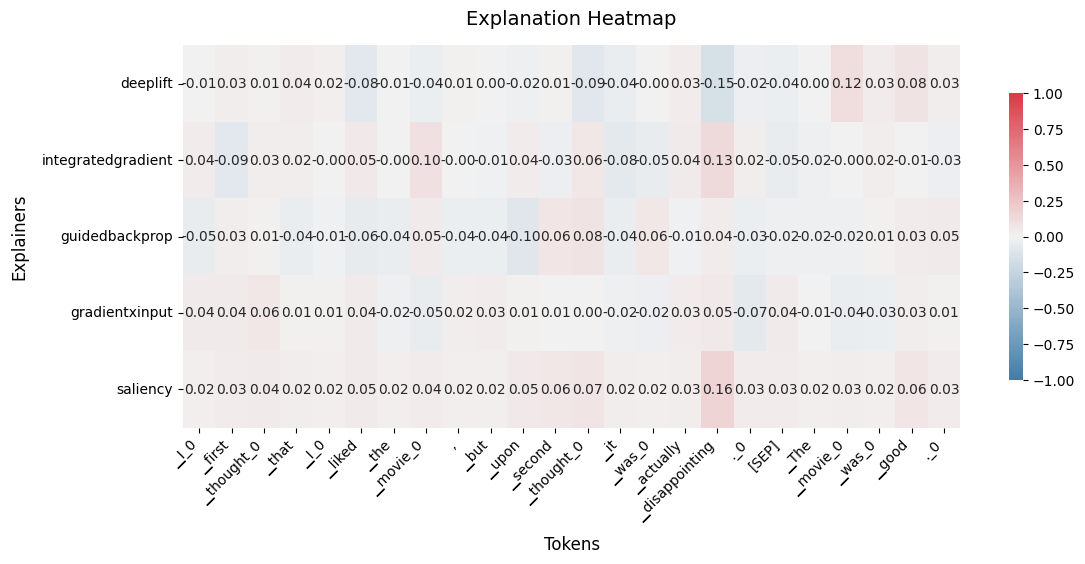

In [11]:
xai_framework.visualize(exps)

📌 How to Interpret EvalxNLP's Results?

This heatmap shows how different explanation methods (feature attribution techniques) assign importance scores to different words (tokens) in a sentence.

Each row represents a different explanation method, and each column represents a token (word or punctuation) from the input sentence.

🔴 Red (Positive Score) → Word contributes positively to the prediction.

🔵 Blue (Negative Score) → Word contributes negatively to the prediction.

⚪ White/Neutral (Close to 0) → Word has little to no effect on the prediction.



Step 5: Evaluate the explanations

You can evaluate explanations from different explainers initialized during the creation of the `XAIBenchmark` class using the `evaluate_single_sentence` function.

- If you provide a **human rationale**, **plausibility metrics** will be calculated.  
- If no rationale is provided, plausibility metrics **will not** be included.  

In [12]:
xai_framework.evaluate_single_sentence(sentence, target_label="contradiction")

explainer deeplift
explainer integratedgradient
explainer guidedbackprop
explainer gradientxinput
explainer saliency


Evaluator,Sparseness
Explainer,
deeplift,0.427275
gradientxinput,0.363275
guidedbackprop,0.237121
integratedgradient,0.357630
saliency,0.241484


Alternatively, you can use each evaluator’s `compute` function to assess individual metrics.  
For **plausibility metrics**, make sure to **add a rationale** to the explanation object before evaluation.

In [19]:
ig_exps.rationale= [0, 1, 0, 1, 0,0,0,0,1,0,1,0]
iou_f1.compute(ig_exps)
auprc.compute(ig_exps)

np.float64(0.33766233766233766)

#### Dataset

Step 1: Load the model and tokenizer

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

Step 2: Load the dataset

You can load any text classification dataset using the `load_fields_from_dataset` function, provided you specify the `LoadDatasetArgs` as follows:  
- **`dataset_name`** - The field containing dataset name on huggingface/ "csv", "json", etc for local files
- **`input_text_field`** – The field containing the text data.  
- **`label_field`** – The field containing the class labels.  
- **`rationale_field`** (optional) – The field marking important tokens in the text.
- **`dataset_files`** (optional) - The field containing filepath to a local csv/excel file e.g. ["healthFC_annotated.csv"]

HuggingFace Dataset

In [67]:
from dataset_loaders.dataset_loader import LoadDatasetArgs,load_fields_from_dataset

dataset_args_ = LoadDatasetArgs(
    dataset_name="niurl/eraser_esnli",
    text_field="premise",
    text_field_2="hypothesis",
    label_field="classification",
    dataset_split="test",
)

# Load the dataset fields
results = load_fields_from_dataset(dataset_args_)

Loading dataset...


In [74]:
input_texts= results['text']
labels= results['labels']
input_texts_1= results['text_2']
input_texts[0], labels[0], input_texts_1[0]

(array(['A', 'man', 'in', 'green', 'pants', 'and', 'blue', 'shirt',
        'pushing', 'a', 'cart.'], dtype=object),
 'contradiction',
 array(['A', 'woman', 'is', 'smoking', 'a', 'cigarette.'], dtype=object))

Expected Outputs:

- **`input_texts`** → An array of strings (text samples).  
- **`labels`** → An array of strings (corresponding class labels).  
- **`rationale`** → An array of binary values (`0` or `1`), indicating which tokens in the text are important.  

*You can preprocess or postprocess the data to ensure it is in the expected format if needed.*

Pre-processing

In [75]:
# Create a list of tuples by joining corresponding elements
samples = [(" ".join(input_texts[idx]), " ".join(input_texts_1[idx])) for idx in range(len(input_texts))]
samples

[('A man in green pants and blue shirt pushing a cart.',
  'A woman is smoking a cigarette.'),
 ('A man in green pants and blue shirt pushing a cart.',
  'There is a man wearing cloths.'),
 ('A man in green pants and blue shirt pushing a cart.',
  'An old man pushing a cart.'),
 ('A beautiful bride walking on a sidewalk with her new husband.',
  'Newlyweds sitting on a park bench.'),
 ('A beautiful bride walking on a sidewalk with her new husband.',
  'A couple walks outdoors together.'),
 ('A beautiful bride walking on a sidewalk with her new husband.',
  'Newlyweds walk down the sidewalk from the church.'),
 ('A young man, wearing a white shirt, prepares hotdogs on a small grill.',
  'A young man is grilling fish in his underwear.'),
 ('A young man, wearing a white shirt, prepares hotdogs on a small grill.',
  'A young man is grilling food.'),
 ('A young man, wearing a white shirt, prepares hotdogs on a small grill.',
  'A young man is grilling hotdogs for a Memorial Day party.'),
 (

Select a sub-sample of the dataset

In [ ]:
#Select a sub-sample if you want
input_texts_sample=samples[:2]
labels_sample=labels[:2]

Step 3: Generate Explanations

In [62]:
exp_scores= xai_framework.get_feature_importance_for_dataset(input_texts=input_texts_sample,labels=labels_sample)
exp_scores

Processing instance 0
A man in green pants and blue shirt pushing a cart. [SEP] A woman is smoking a cigarette.
contradiction
Found cached explanation for deeplift
Found cached explanation for integratedgradient
Found cached explanation for guidedbackprop
Found cached explanation for gradientxinput
Found cached explanation for saliency
Processing instance 1
A man in green pants and blue shirt pushing a cart. [SEP] There is a man wearing cloths.
entailment
Found cached explanation for deeplift
Found cached explanation for integratedgradient
Found cached explanation for guidedbackprop
Found cached explanation for gradientxinput
Found cached explanation for saliency


{'deeplift': [Explanation(text=['A man in green pants and blue shirt pushing a cart. [SEP] A woman is smoking a cigarette.'], tokens=['[CLS]', '▁A', '▁man', '▁in', '▁green', '▁pants', '▁and', '▁blue', '▁shirt', '▁pushing', '▁a', '▁cart', '.', '[SEP]', '▁A', '▁woman', '▁is', '▁smoking', '▁a', '▁cigarette', '.', '[SEP]'], scores=array([-0.05920079, -0.0197336 ,  0.11050814, -0.0049334 ,  0.02762703,
          0.04736063, -0.01578688, -0.01578688, -0.00394672,  0.04736063,
          0.03009374, -0.04736063, -0.10656142,  0.02565368, -0.00789344,
         -0.04736063, -0.05525407, -0.17365564, -0.00394672,  0.09472127,
          0.01578688, -0.03946719], dtype=float32), explainer='deeplift', target_pos_idx=2, target_token_pos_idx=None, target='contradiction', target_token=None, rationale=None),
  Explanation(text=['A man in green pants and blue shirt pushing a cart. [SEP] There is a man wearing cloths.'], tokens=['[CLS]', '▁A', '▁man', '▁in', '▁green', '▁pants', '▁and', '▁blue', '▁shirt', 

Step 4: Evaluate Explanations and generate table 

In [63]:
metrics= xai_framework.compute_evaluation_metrics(exp_scores)
xai_framework.create_pivot_table(metrics)


Explainer: deeplift
Computing value for Sparseness

Explainer: integratedgradient
Computing value for Sparseness

Explainer: guidedbackprop
Computing value for Sparseness

Explainer: gradientxinput
Computing value for Sparseness

Explainer: saliency
Computing value for Sparseness


Evaluator,Sparseness
Explainer,
deeplift,0.443128
gradientxinput,0.489898
guidedbackprop,0.506677
integratedgradient,0.394393
saliency,0.285592


You can also do `Step 3` and `Step 4` together within a single function call.

In [64]:
xai_framework.benchmark_dataset(input_texts_sample, labels_sample)

Processing instance 0
A man in green pants and blue shirt pushing a cart. [SEP] A woman is smoking a cigarette.
contradiction
Found cached explanation for deeplift
Found cached explanation for integratedgradient
Found cached explanation for guidedbackprop
Found cached explanation for gradientxinput
Found cached explanation for saliency
Processing instance 1
A man in green pants and blue shirt pushing a cart. [SEP] There is a man wearing cloths.
entailment
Found cached explanation for deeplift
Found cached explanation for integratedgradient
Found cached explanation for guidedbackprop
Found cached explanation for gradientxinput
Found cached explanation for saliency

Explainer: deeplift
Computing value for Sparseness

Explainer: integratedgradient
Computing value for Sparseness

Explainer: guidedbackprop
Computing value for Sparseness

Explainer: gradientxinput
Computing value for Sparseness

Explainer: saliency
Computing value for Sparseness


Evaluator,Sparseness
Explainer,
deeplift,0.443128
gradientxinput,0.489898
guidedbackprop,0.506677
integratedgradient,0.394393
saliency,0.285592
